In [33]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [3]:
# step 1
# 1-Getting the data ready 
# x input data on which we will predict any other ouput  , this is independent data 
x=pd.read_csv("Boston.csv")
x.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
x.isna().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

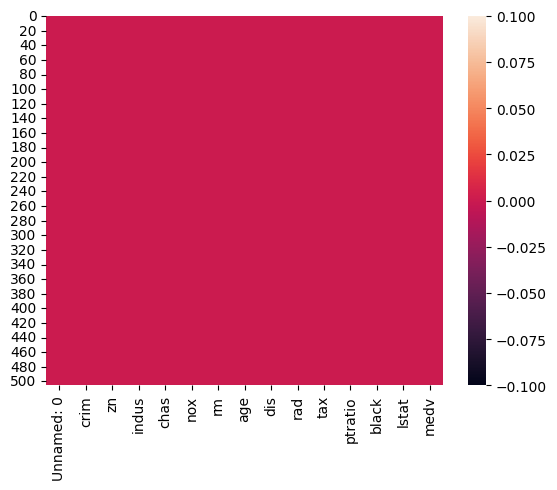

In [6]:
sns.heatmap(x.isna());

In [8]:
#corelation will be only between the integers values
cor=x.corr()

In [10]:
cor.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260


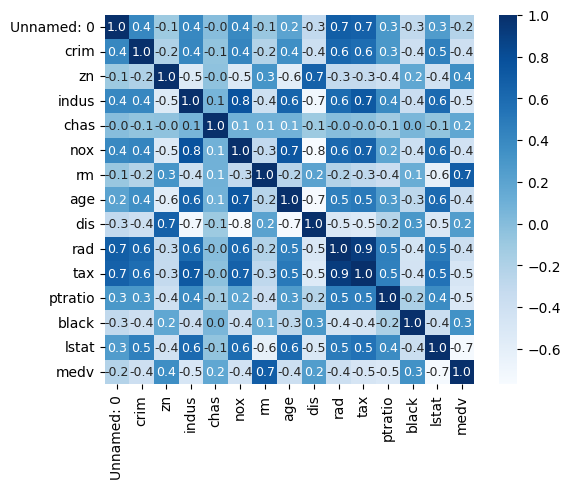

In [30]:
sns.heatmap(cor,square=True,fmt='.1f',annot=True,annot_kws={'size':9},cmap='Blues');

In [31]:
#Independent varicble 
X=x.drop(['medv'],axis =1)
#dependent variable
y=x['medv']
X,y

(     Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
 0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
 1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
 2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
 3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
 4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
 ..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
 501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
 502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
 503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
 504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
 505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   
 
      tax  ptratio   black

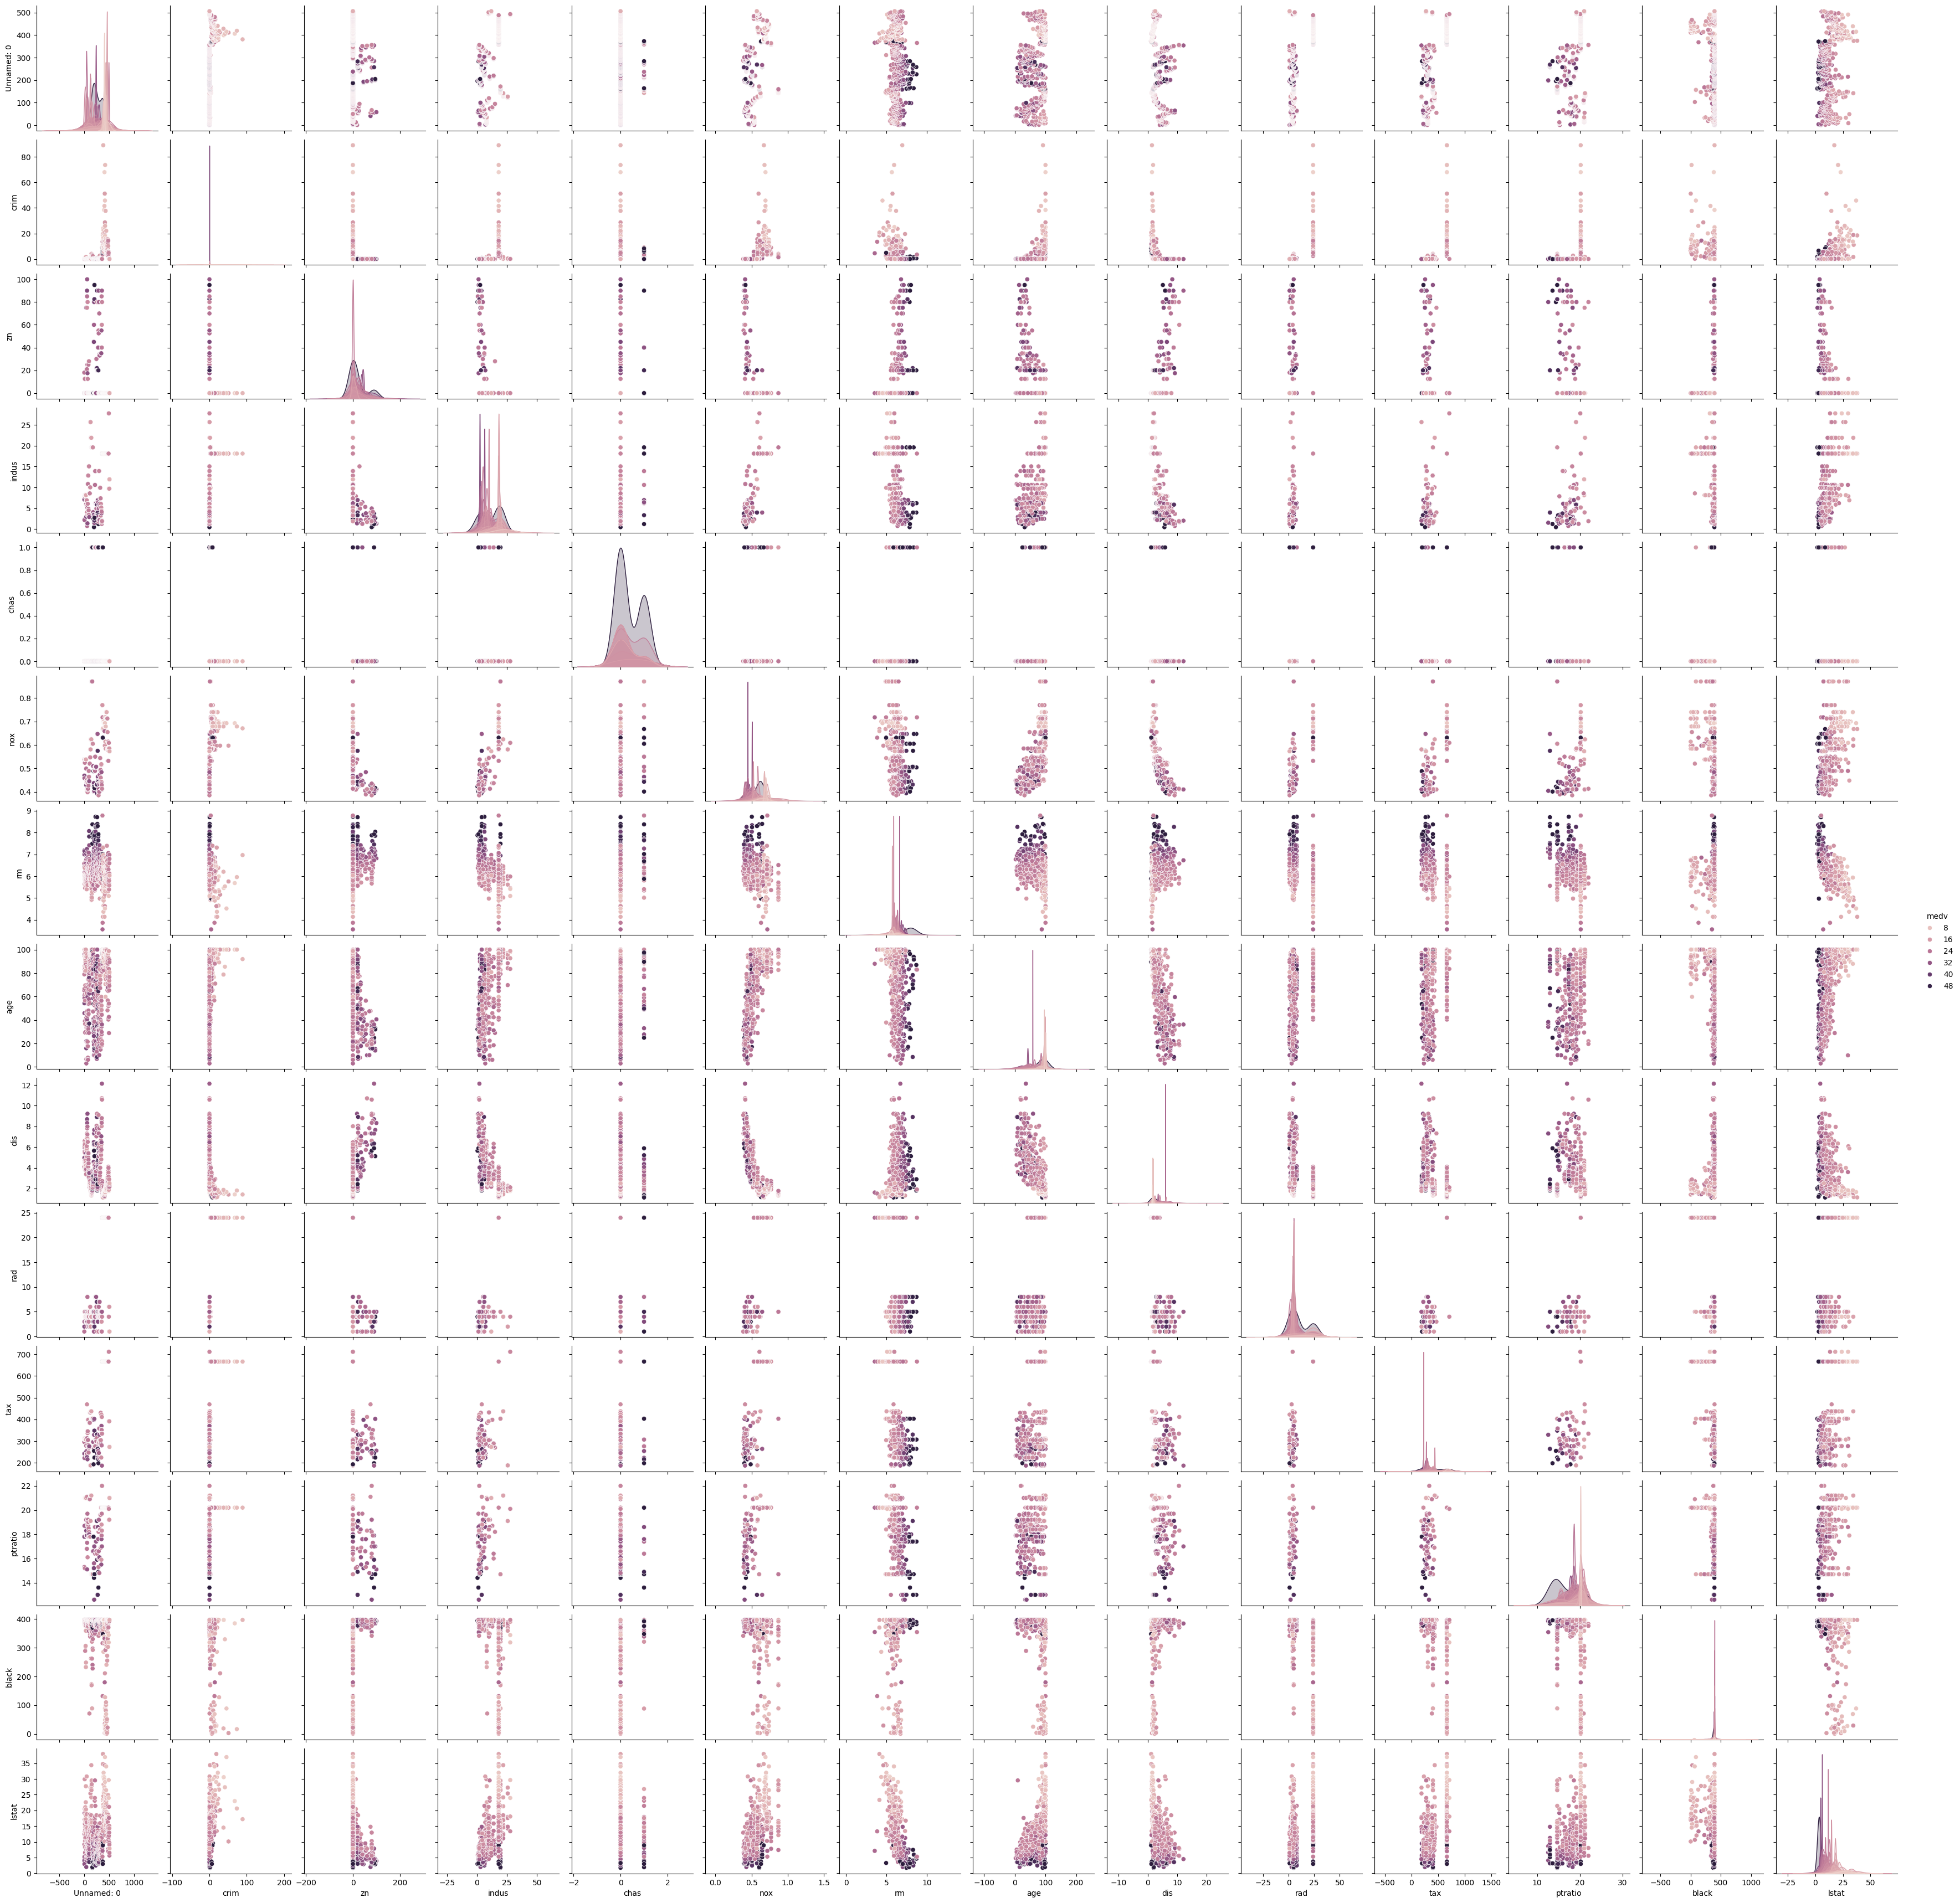

In [50]:
sns.pairplot(x,hue='medv')

In [32]:
#now divde the data of training and testing 
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

In [34]:
xgb=XGBRegressor()

In [35]:
xgb.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
predicted_y=xgb.predict(X_test)

In [37]:
predicted_y

array([30.077166, 17.83093 , 12.095765, 27.568874, 23.194668, 15.243751,
       15.832864, 33.081146, 19.412853, 11.068023,  9.38581 , 19.365976,
       22.135563, 16.691713,  8.427381, 23.024847, 25.38725 , 18.529713,
       47.104084, 11.298432, 18.802135, 21.688513, 31.903584, 22.33872 ,
       26.0612  , 21.170343, 16.939615, 19.36273 , 36.11217 , 20.236408,
       32.652077, 19.444174, 26.216965, 21.42281 , 21.633785, 24.65556 ,
       21.932106, 18.947773, 15.064873, 26.576515, 23.71612 , 25.857504,
       18.568617, 16.492983, 18.891191, 21.154554, 16.42746 , 13.106385,
       22.423044,  8.527008,  8.85019 , 23.60639 , 18.3884  , 28.098839,
       14.84537 , 34.099224, 18.128592, 23.026281, 18.502438, 19.433718,
       17.92776 , 16.696966, 21.774572, 35.232742, 22.019333, 43.29086 ,
       22.701227, 15.648358, 21.2218  , 30.95021 , 28.899937, 34.797565,
       42.791454, 15.122447, 21.499247, 27.018173, 20.18397 , 20.230246,
        8.419919, 28.136206, 10.052165,  9.021052, 

In [38]:
xgb.score(X_train,y_train)

0.9999950200639124

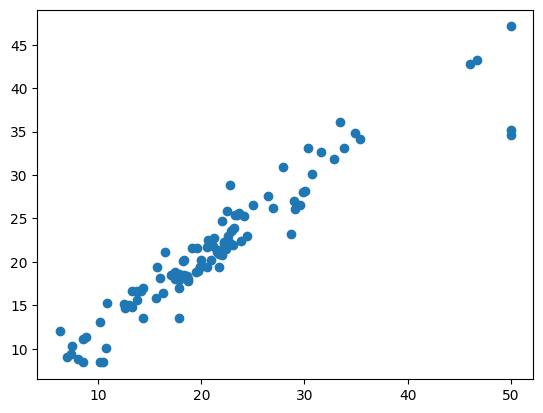

In [43]:
plt.scatter(y_test,predicted_y);

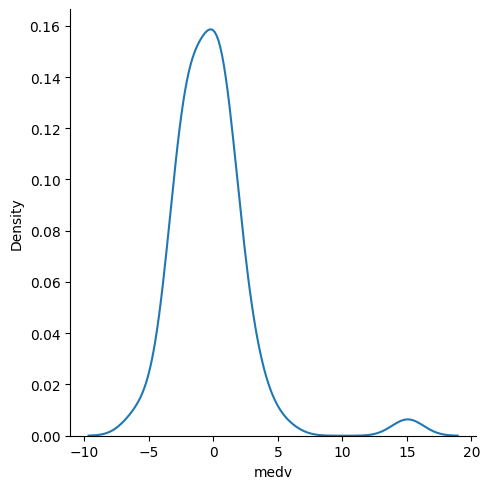

In [45]:
sns.displot(y_test-predicted_y,kind='kde');

In [48]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(f"R squared error :{r2_score(y_test,predicted_y)}")
print(f"mean_absolute_error :{mean_absolute_error(y_test,predicted_y)}")
print(f"mean_squared_error:{mean_squared_error(y_test,predicted_y)}")

R squared error :0.8912669528862167
mean_absolute_error :1.97855603835162
mean_squared_error:8.97538087019638
